In [1]:
#import warnings
#warnings.filterwarnings('ignore') # make the notebook nicer

In [4]:
#conda install -c ambermd pytraj
#conda install -c bioconda nglview
#jupyter-nbextension enable nglview --py --sys-prefix
#%matplotlib widget

In [1]:
#interactive 
import pytraj as pt
import nglview as nv
from subprocess import call
f = open("helix.pdb", "w")
call(["./fd_helix", "abdna","aaaaaaaaaa"], stdout=f)
traj = pt.load('helix.pdb')
pt.rotate(traj, 'y 90')
view = nv.show_pytraj(traj)
view

NGLWidget()

In [2]:
# static image 
view.render_image()

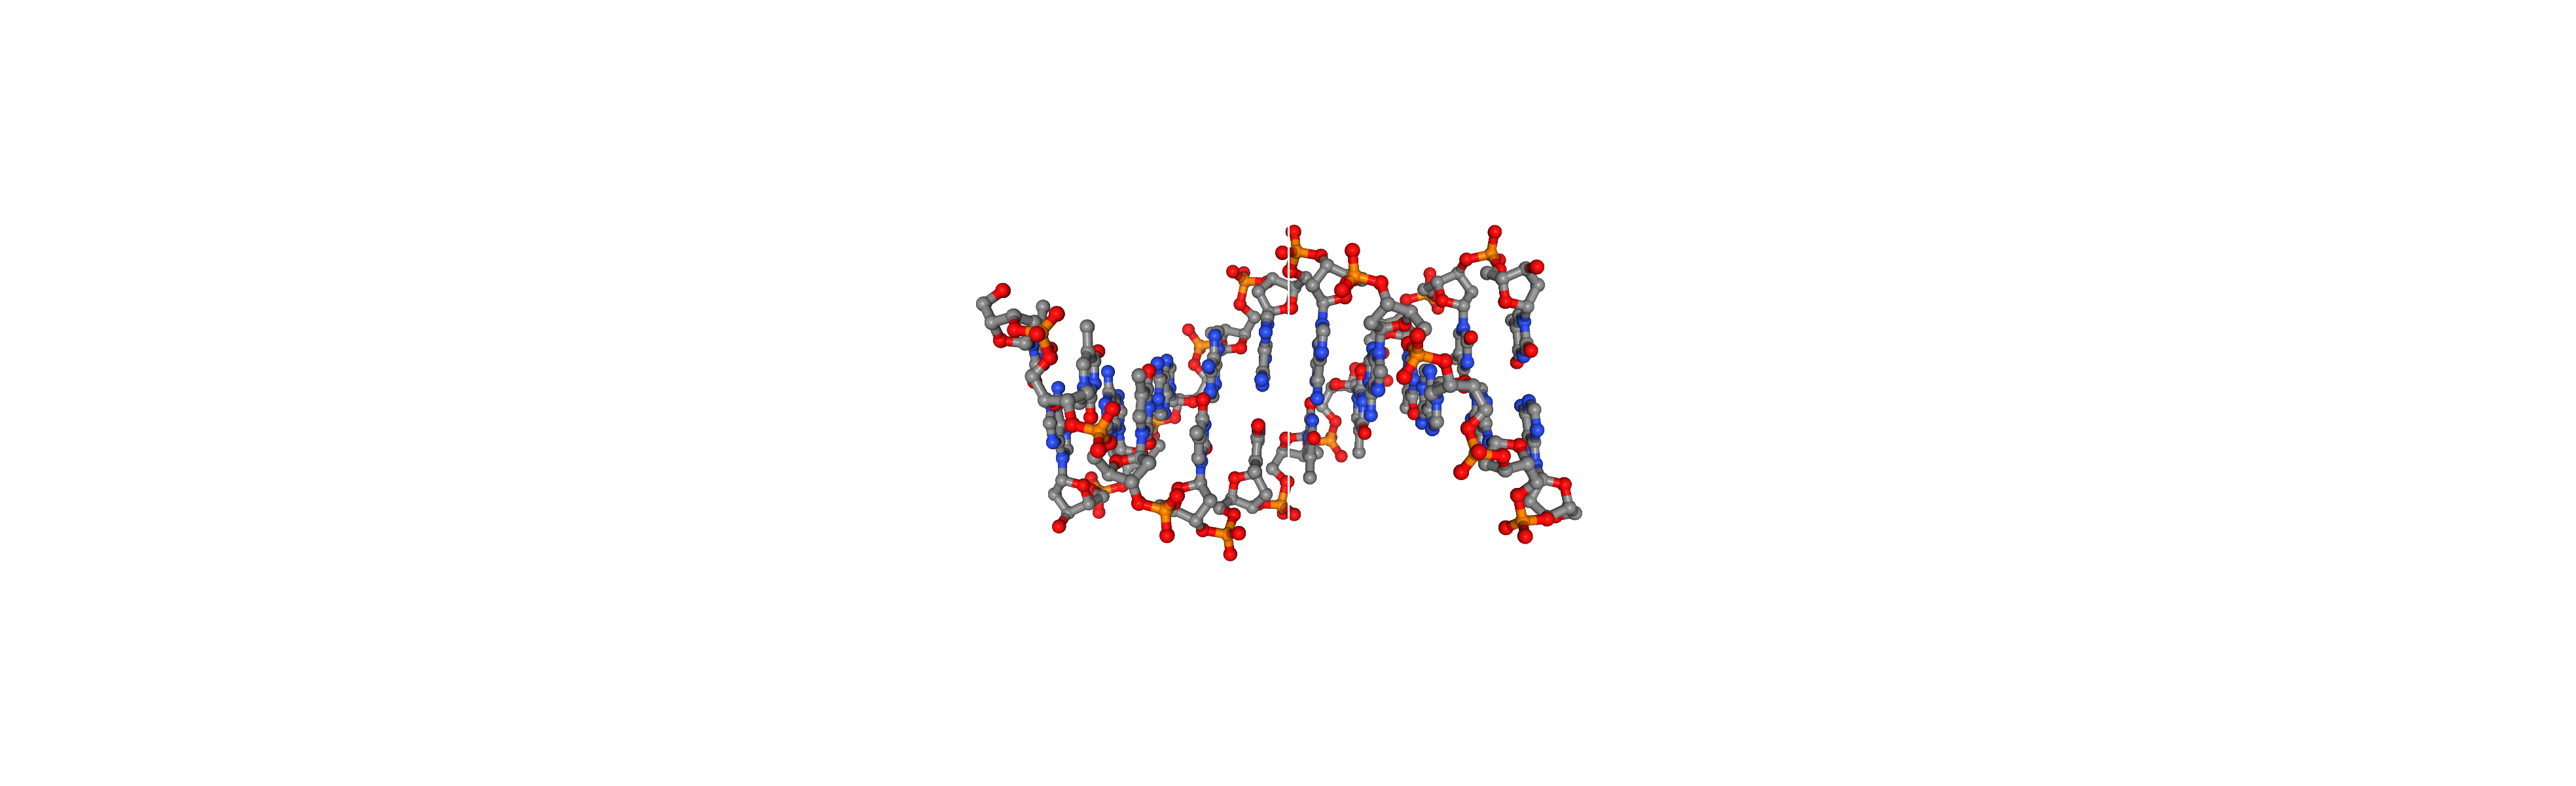

In [3]:
view._display_image()

In [4]:
!wget 'https://raw.githubusercontent.com/openmm/openmmforcefields/master/amber/ffxml/DNA.bsc1.xml'

--2020-04-14 20:18:26--  https://raw.githubusercontent.com/openmm/openmmforcefields/master/amber/ffxml/DNA.bsc1.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105652 (103K) [text/plain]
Saving to: ‘DNA.bsc1.xml.8’

DNA.bsc1.xml.8      100%[===================>] 103.18K  --.-KB/s    in 0.03s   

2020-04-14 20:18:27 (3.36 MB/s) - ‘DNA.bsc1.xml.8’ saved [105652/105652]



In [5]:
#conda install -c omnia openmm
from simtk.openmm.app import *
from simtk.openmm import *
from simtk.unit import *
from sys import stdout

pdb = PDBFile('helix.pdb')
forcefield = ForceField('DNA.bsc1.xml')
#forcedield=ForceField('DNA.bsc1.xml, tip3p.xml')

In [6]:
pdb.getTopology()

<Topology; 2 chains, 20 residues, 404 atoms, 452 bonds>

In [7]:
modeller = Modeller (pdb.topology, pdb.positions)
modeller.addHydrogens (forcefield)
modeller.getTopology()

<Topology; 2 chains, 20 residues, 638 atoms, 686 bonds>

In [8]:
pdbfile.PDBFile.writeModel(modeller.topology,modeller.positions,open('output.pdb','w'))
traj = pt.load('output.pdb')
pt.rotate(traj, 'y 90')
view = nv.show_pytraj(traj)
view

NGLWidget()

In [9]:
# static image 
view.render_image()

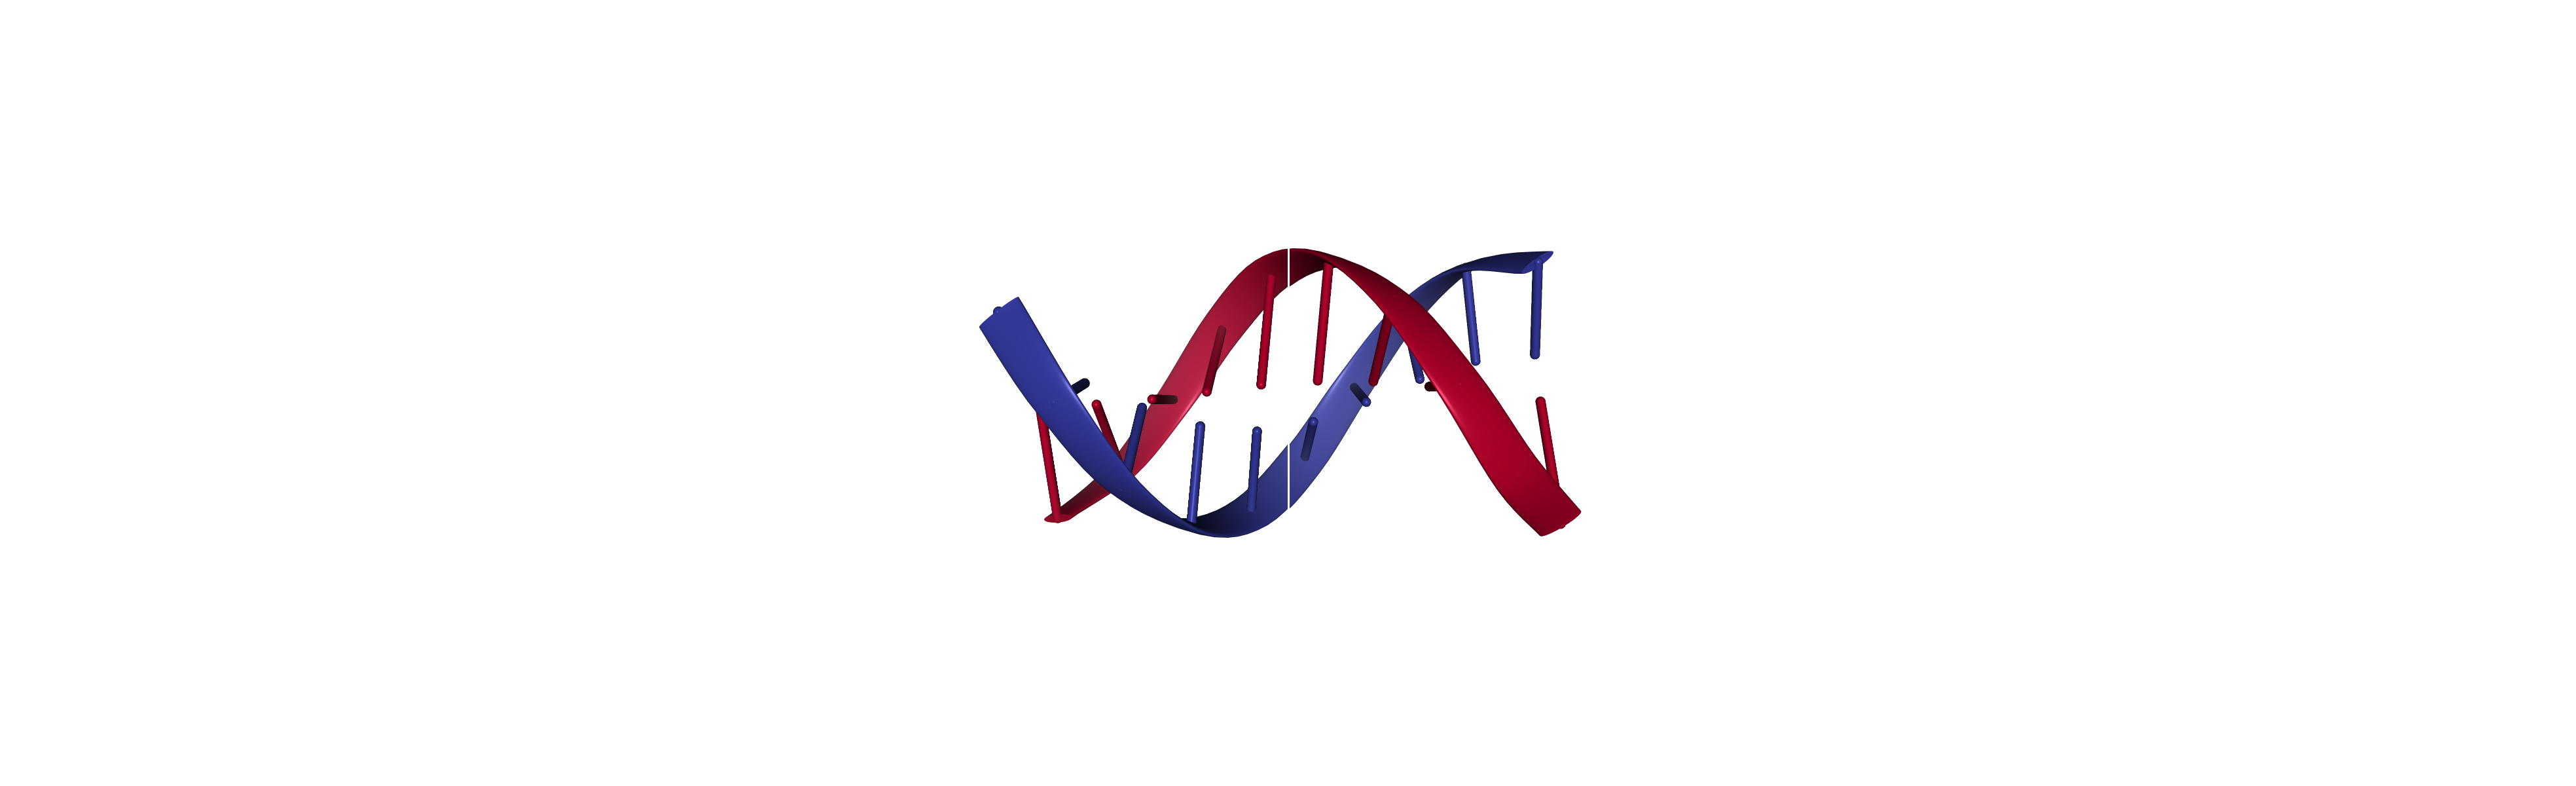

In [10]:
view._display_image()

In [15]:
integrator = LangevinIntegrator(300*kelvin, 1/picosecond, 0.002*picoseconds)

In [16]:
system = forcefield.createSystem(modeller.topology)
simulation = Simulation(modeller.topology, system, integrator)
simulation.context.setPositions(modeller.positions)
simulation.minimizeEnergy()

In [17]:
simulation.reporters.append(PDBReporter('output.pdb',1))
simulation.reporters.append(StateDataReporter(stdout, 1, step=True,potentialEnergy=True, temperature=True))
simulation.step(10)

#"Step","Potential Energy (kJ/mole)","Temperature (K)"
1,517.7768581150285,0.9524563325729839
2,521.5623581923778,1.697591372673097
3,526.1758940852692,2.3574249901033304
4,533.7062110579743,2.833702846992486
5,537.0483813484382,3.521507451474773
6,541.0699596539082,4.285376458319397
7,547.9222359687622,4.685317599330996
8,552.6911797652942,5.180095098032011
9,557.3532995344299,5.879147039283801
10,562.1963749132785,6.676298849768736


In [18]:
traj = pt.load('output.pdb')
pt.rotate(traj, 'y 90')
view = nv.show_pytraj(traj)
view

NGLWidget(count=10)